* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
df = df.sort_values(by='Date')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

In [6]:
df = df[~((df['Month'] == 2) & (df['Day'] == 29))]

In [7]:
df = df.set_index(['Date', 'Element'])

In [8]:
s1 = df.groupby(level=[0, 1]).agg({'Data_Value': 'max'})
s2 = df.groupby(level=[0, 1]).agg({'Data_Value': 'min'})
s1 = s1.reset_index()
s2 = s2.reset_index()
s1 = s1[s1['Element']=='TMAX']
s2 = s2[s2['Element']=='TMIN']

In [9]:
s1['Month'], s1['Day'], s1['Year'] = s1['Date'].dt.month, s1['Date'].dt.day, s1['Date'].dt.year
s2['Month'], s2['Day'], s2['Year'] = s2['Date'].dt.month, s2['Date'].dt.day, s2['Date'].dt.year

In [10]:
s1.head()

,Date,Element,Data_Value,Month,Day,Year
0,2005-01-01,TMAX,156,1,1,2005
2,2005-01-02,TMAX,139,1,2,2005
4,2005-01-03,TMAX,133,1,3,2005
6,2005-01-04,TMAX,39,1,4,2005
8,2005-01-05,TMAX,33,1,5,2005


In [11]:
s1_pre, s1_2015 = s1[s1['Year']<=2014], s1[s1['Year']==2015]
s2_pre, s2_2015 = s2[s2['Year']<=2014], s2[s2['Year']==2015]

In [12]:
maxes = s1_pre.groupby(by=['Month', 'Day']).agg({'Data_Value': 'max'})
mins  = s2_pre.groupby(by=['Month', 'Day']).agg({'Data_Value': 'min'})
highs_2015 = s1_2015.groupby(by=['Month', 'Day']).agg({'Data_Value': 'max'})
lows_2015 = s2_2015.groupby(by=['Month', 'Day']).agg({'Data_Value': 'max'})

In [13]:
maxes = maxes.reset_index()
mins = mins.reset_index()
highs_2015 = highs_2015.reset_index()
lows_2015 = lows_2015.reset_index()

In [14]:
broken_high = highs_2015[highs_2015['Data_Value'] > maxes['Data_Value']]
broken_low = lows_2015[lows_2015['Data_Value'] < mins['Data_Value']]

In [15]:
broken_high.head()

,Month,Day,Data_Value
39,2,9,83
106,4,17,278
126,5,7,306
127,5,8,333
130,5,11,306


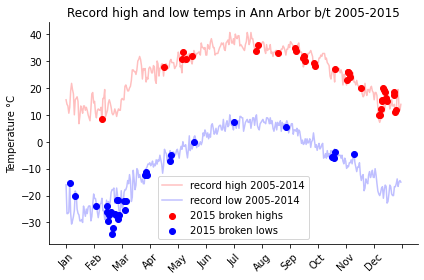

In [19]:
import matplotlib.pyplot as plt
#%matplotlib widget
fig, ax = plt.subplots()

ax.plot(maxes['Data_Value']/10, color='red', zorder=1, alpha=0.25, label='record high 2005-2014');
ax.plot(mins['Data_Value']/10, color='blue', zorder=1, alpha=0.25, label='record low 2005-2014');

ax.scatter(x=broken_high.index, y=broken_high['Data_Value']/10, color='red', zorder=2, label='2015 broken highs');
ax.scatter(x=broken_low.index, y=broken_low['Data_Value']/10, color='blue', zorder=2, label='2015 broken lows');

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''];
plt.xticks(np.linspace(0,365,13), months);
plt.xticks(rotation=45);

ax.set_title('Record high and low temps in Ann Arbor b/t 2005-2015');
#ax.fill_between(x=maxes.index, y1=maxes['Data_Value']/10, y2=mins['Data_Value']/10, facecolor='red', alpha=0.1);

ax.legend()

ax.set_ylabel('Temperature \N{DEGREE SIGN}C')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()
fig.savefig('./vis.png', facecolor='white', transparent=False)